In [114]:
import pandas as pd
import requests
import time
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Load imbd movies dataset
url = '/Users/rishikeshdhokare/Downloads/MergedDataSet/Final/final_omdb_data_no_duplicates.csv'
df = pd.read_csv(url)
df

,Title,Actor,Genre,imdbRating,imdbVotes,Runtime,BoxOffice,Year,Awards,Country,Language,Type
0,Batteries not included,"Hume Cronyn, Jessica Tandy, Frank McRae, Eliza...","Comedy, Family, Fantasy",6.6,"38,101",107,"$32,945,797",1987,2 wins & 1 nomination,United States,"English, Spanish",Movie
1,10 Cloverfield Lane,"John Goodman, Mary Elizabeth Winstead, John Ga...","Drama, Horror, Mystery",7.2,"361,826",103,"$72,082,998",2016,16 wins & 48 nominations,United States,English,Movie
2,10 Things I Hate About You,"Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Comedy, Drama, Romance",7.3,"397,094",97,"$38,178,166",1999,2 wins & 13 nominations,United States,"English, French",Movie
3,10 Years,"Channing Tatum, Rosario Dawson, Chris Pratt, J...","Comedy, Drama, Romance",6.1,"27,291",100,"$203,373",2011,NaN,United States,English,Movie
4,10 to Midnight,"Charles Bronson, Lisa Eilbacher, Andrew Steven...","Crime, Drama, Thriller",6.3,"9,596",101,"$7,175,592",1983,NaN,United States,English,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
4847,Zookeeper,"Kevin James, Rosario Dawson, Leslie Bibb, Ken ...","Comedy, Family, Fantasy",5.2,"65,914",102,"$80,360,843",2011,1 win & 2 nominations,United States,English,Movie
4848,Zoolander,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...",Comedy,6.5,"296,416",90,"$45,172,250",2001,1 win & 11 nominations,"Germany, United States, Australia",English,Movie
4849,Zoolander 2,"Ben Stiller, Owen Wilson, Pen©lope Cruz, Will ...",Adventure,4.7,"77,093",101,"$28,848,693",2016,7 wins & 17 nominations,"United States, Italy","English, Italian, Spanish",Movie
4850,Zootopia,"Rich Moore, Jared Bush, Ginnifer Goodwin, Jaso...",Animation,8.0,"559,763",108,"$341,268,248",2016,Won 1 Oscar. 49 wins & 75 nominations total,United States,English,Movie



Average BoxOffice by Runtime Category:
Runtime_Category
120-150 min    7.686788e+07
150-180 min    9.603365e+07
180-210 min    1.285707e+08
90-120 min     4.106020e+07
< 90 min       3.472526e+07
> 210 min      3.288634e+07
Name: BoxOffice, dtype: float64


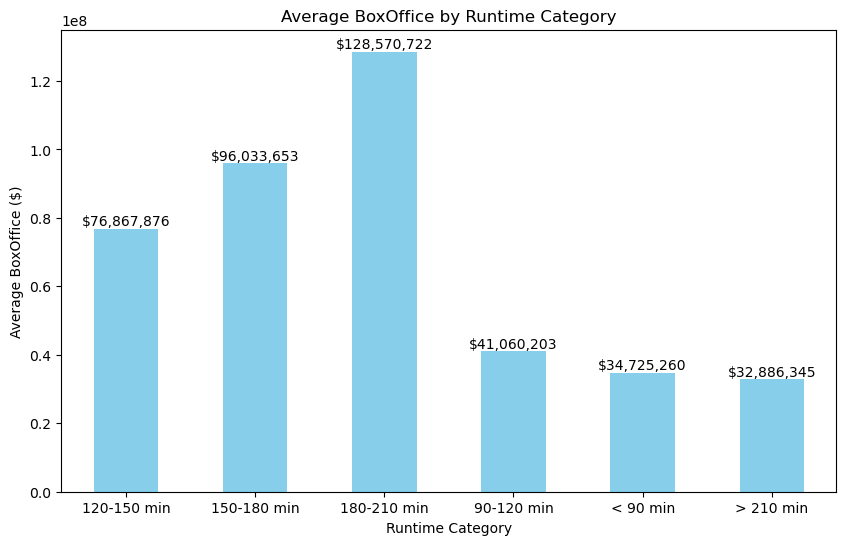

In [124]:
#Hypothesis 3
df['BoxOffice'] = df['BoxOffice'].replace({r'\$': '', r',': ''}, regex=True)
df['BoxOffice'] = pd.to_numeric(df['BoxOffice'], errors='coerce')  # Convert to numeric, coerce errors

df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

def classify_runtime(runtime):
    if pd.isna(runtime):
        return 'Unknown'
    if runtime < 90:
        return '< 90 min'
    elif 90 <= runtime < 120:
        return '90-120 min'
    elif 120 <= runtime < 150:
        return '120-150 min'
    elif 150 <= runtime < 180:
        return '150-180 min'
    elif 180 <= runtime < 210:
        return '180-210 min'
    else:
        return '> 210 min'

df['Runtime_Category'] = df['Runtime'].apply(classify_runtime)
runtime_boxoffice_avg = df.groupby('Runtime_Category')['BoxOffice'].mean()
print("\nAverage BoxOffice by Runtime Category:")
print(runtime_boxoffice_avg)

categories = ['< 90 min','90-120 min','120-150 min', '150-180 min', '180-210 min', '> 210 min']
for category in categories:
    if category not in runtime_boxoffice_avg:
        runtime_boxoffice_avg[category] = None

# Graph
plt.figure(figsize=(10, 6))
runtime_boxoffice_avg.plot(kind='bar', color=['skyblue'])
plt.title('Average BoxOffice by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average BoxOffice ($)')
plt.xticks(rotation=0)

for i in range(len(runtime_boxoffice_avg)):
    plt.text(i, runtime_boxoffice_avg.iloc[i], 
             f"${runtime_boxoffice_avg.iloc[i]:,.0f}" if pd.notna(runtime_boxoffice_avg.iloc[i]) else 'N/A', 
             ha='center', va='bottom')
plt.show()
